# ÁRBOL DE DECISIÓN
### Elaboración de un árbol de decisión para clasificar diferentes especies de plantas utilizando el dataset Iris.csv
### Diego Miranda Olavarría
### Magíster en Data Science (E)

In [1]:
import pandas as pd                                 # Carga del dataset
import matplotlib.pyplot as plt                     # Visualización de gráficos
import numpy as np                                  # Librería para realizar operaciones matemáticas
from sklearn.tree import DecisionTreeClassifier     # Crea el árbol de decisión
from sklearn import tree                            # Librería para visualizar el árbol
from sklearn.model_selection import train_test_split # Conjunto de entrenamiento y validación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tabulate import tabulate                        # Crea una tabla con los medidores        
import seaborn as sns                                # Librería para visualización de datos
from sklearn.metrics import roc_curve, roc_auc_score # Librería para el cálculo AUC y Curva ROC 
from sklearn.preprocessing import label_binarize     # Binarizar los datos

In [2]:
data = pd.read_csv("iris.csv")
data.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
data.info

<bound method DataFrame.info of      Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [4]:
X = data[["Sepal.Length","Sepal.Width","Petal.Length","Petal.Width"]]
y = data["Species"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state=0)

In [6]:
arbol = DecisionTreeClassifier(max_depth=4)

In [7]:
arbol_iris = arbol.fit(X_train, y_train)

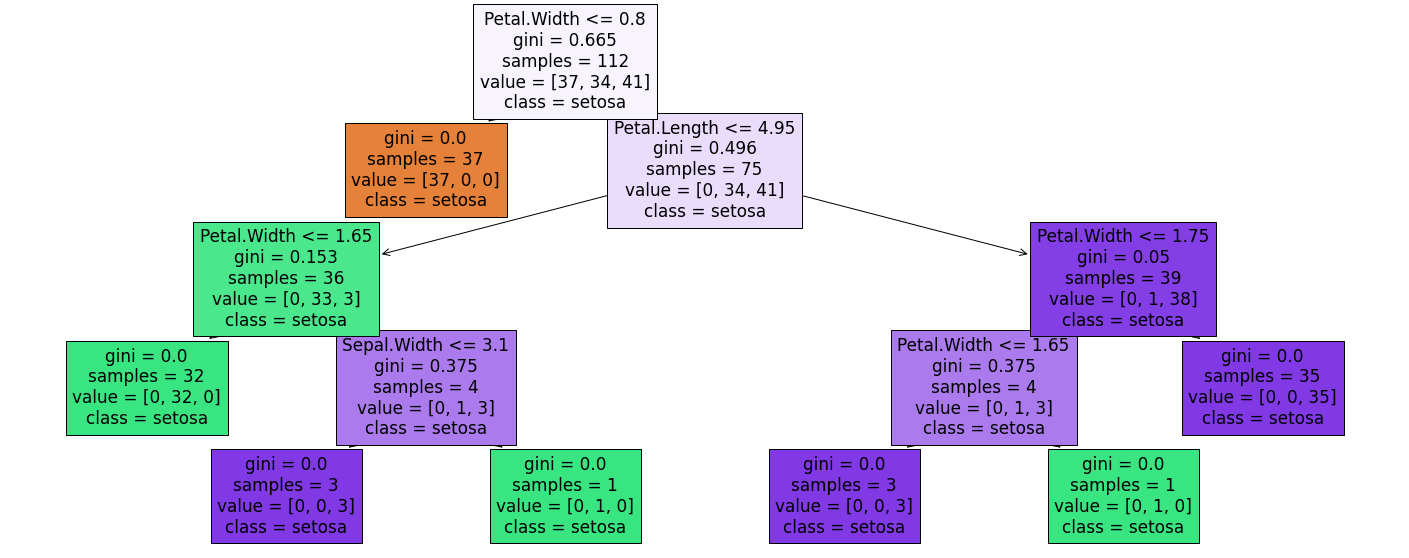

In [8]:
fig = plt.figure(figsize=(25,10))
tree.plot_tree(arbol_iris, feature_names=list(X.columns.values),
              class_names=list(y.values), filled=True)
plt.show()

In [9]:
# Predicciones del modelo
y_pred = arbol_iris.predict(X_test)
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica'], dtype=object)

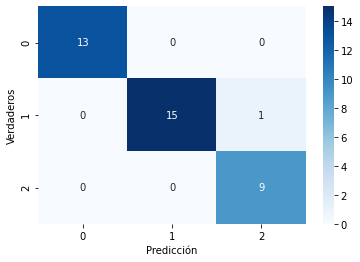

In [10]:
# Matríz de confusión para calcular la precisión del modelo
matriz = confusion_matrix(y_test, y_pred)


# Mapa de calor Matríz de Confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Verdaderos")
plt.show()

In [11]:
# Precisión global
precision = np.sum(matriz.diagonal())/np.sum(matriz) 
print("La precisión del modelo es: ",precision)

La precisión del modelo es:  0.9736842105263158


In [12]:
# Precisión por clase
precision_clase = ((matriz[1,1]))/sum(matriz[1,])
print("La precisión por clase es: ",precision_clase)

La precisión por clase es:  0.9375


In [13]:
# Calculamos la Exactitud, Precisión, Sensibilidad, Especificidad y Medida F1
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
spec = confusion_matrix(y_test, y_pred)[0, 0] / (confusion_matrix(y_test, y_pred)[0, 0] + confusion_matrix(y_test, y_pred)[0, 1] )

# Mostramos los resultados en una tabla
table = [
    ["Árbol de Decisión", acc, prec, rec, spec, f1]
]
headers = ["Algoritmo", "Exactitud", "Precisión", "Sensibilidad", "Especificidad","Medida F1"]

print(tabulate(table, headers, tablefmt="fancy_grid"))

╒═══════════════════╤═════════════╤═════════════╤════════════════╤═════════════════╤═════════════╕
│ Algoritmo         │   Exactitud │   Precisión │   Sensibilidad │   Especificidad │   Medida F1 │
╞═══════════════════╪═════════════╪═════════════╪════════════════╪═════════════════╪═════════════╡
│ Árbol de Decisión │    0.973684 │    0.976316 │       0.973684 │               1 │    0.973952 │
╘═══════════════════╧═════════════╧═════════════╧════════════════╧═════════════════╧═════════════╛


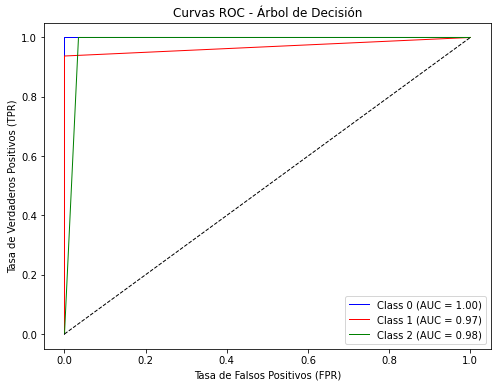

In [14]:
# Creamos las métricas para visualizar la Curva ROC

arbol_probs = arbol.predict_proba(X_test)

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

dt_fpr = dict()
dt_tpr = dict()
dt_auc = dict()
for i in range(len(np.unique(y_test))):
    dt_fpr[i], dt_tpr[i], _ = roc_curve(y_test_bin[:, i], arbol_probs[:, i])
    dt_auc[i] = roc_auc_score(y_test_bin[:, i], arbol_probs[:, i])
    
# Graficar lA Curva ROC para nuestro modelo
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i, color in zip(range(len(np.unique(y_test))), colors):
    plt.plot(dt_fpr[i], dt_tpr[i], color=color, lw=1, label=f'Class {i} (AUC = {dt_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC - Árbol de Decisión')
plt.legend(loc='lower right')
plt.show()

In [19]:
# Hacemos el Cálculo AUC

arbol_avg_auc = np.mean(list(dt_auc.values()))

print("Árbol de Decisión AUC promedio:", dt_avg_auc)

Árbol de Decisión AUC promedio: 0.9838362068965517
